# Photo Classifier: Model evaluation

## Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline
%load_ext autoreload
%autoreload 2
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import random
import numpy as np
import pandas as pd
from collections import Counter
from ipywidgets import interact
import ipywidgets as widgets

In [3]:
from file_io import load_pickle_file
from constants import MODEL_FILE_PATH, IMAGE_DATA_PATH
from image_transforms import IMAGE_TRANSFORMS
from multilabel_interpreter import MultilabelInterpreter

In [4]:
import random
random.seed(42)

In [5]:
DATA_SET = 'test'

## Load model and data

In [6]:
model = load_pickle_file(MODEL_FILE_PATH)
image_data = load_pickle_file(IMAGE_DATA_PATH)

## Prediction

In [7]:
x = image_data.get_images(DATA_SET)
y_true = image_data.get_classes(DATA_SET)

In [8]:
y_pred, probabilities = model.predict(x, IMAGE_TRANSFORMS[DATA_SET])

## Results interpretation

In [9]:
interpreter = MultilabelInterpreter(x, y_pred, y_true, probabilities, model.class_to_label_mapping)

In [10]:
accuracy = interpreter.calculate_accuracy()
accuracy

0.9

In [11]:
accuracy_by_label = interpreter.calculate_accuracy_by_label()
accuracy_by_label

dog    0.977778
cat    0.822222
dtype: float64

In [12]:
confusion_matrix = interpreter.calculate_confusion_matrix()
confusion_matrix

Not implemented


In [13]:
most_incorrect_samples = interpreter.get_most_incorrect_samples(5)
most_incorrect_samples

,prediction_error,dog_prediction,cat_prediction,dog_true,cat_true,confidence,accuracy
15,0.811593,0.782967,0.159781,0,1,0.623187,0.0
42,0.486701,0.996977,0.029622,1,1,0.967355,0.5
41,0.441282,0.980912,0.136525,1,1,0.844387,0.5
6,0.415182,0.906700,0.262936,1,1,0.643764,0.5
13,0.391395,0.997288,0.219921,1,1,0.777367,0.5


In [14]:
most_uncertain_samples = interpreter.get_most_uncertain_samples(5)
most_uncertain_samples

,prediction_error,dog_prediction,cat_prediction,dog_true,cat_true,confidence,accuracy
36,0.249590,0.998689,0.497869,1,0,0.500820,1.0
28,0.252974,0.999581,0.494471,1,1,0.505109,0.5
44,0.229111,0.439289,0.981067,0,1,0.541778,1.0
29,0.219057,0.429876,0.991762,0,1,0.561886,1.0
21,0.323463,0.962821,0.390253,1,1,0.572568,0.5


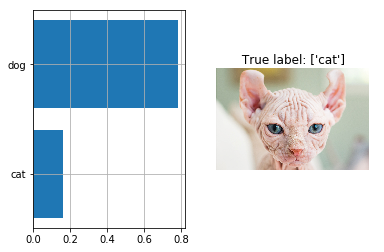

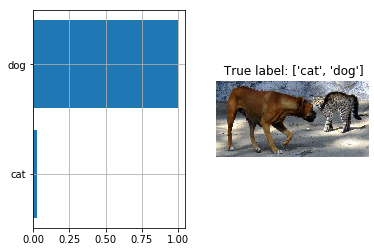

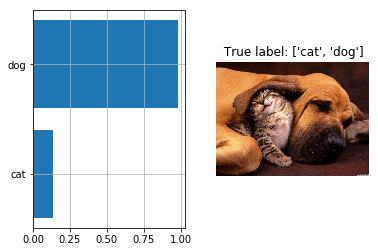

In [15]:
interpreter.plot_most_incorrect_samples(3)

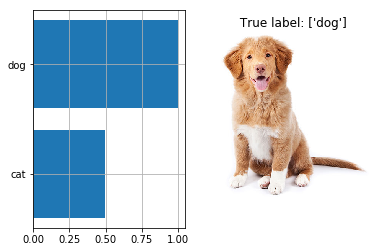

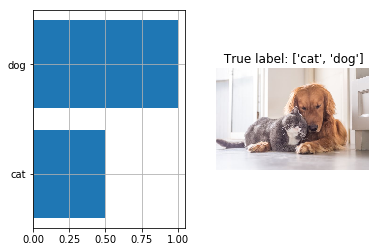

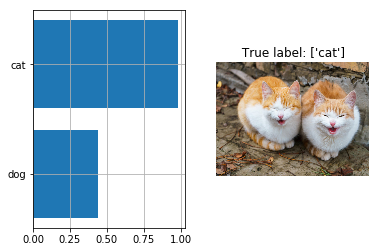

In [16]:
interpreter.plot_most_uncertain_samples(3)

In [17]:
@interact(index=widgets.IntSlider(min=0, max=len(y_true)-1, step=1, value=0, continuous_update=False))
def show_prediction(index=0):
    interpreter.plot_prediction(index)

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=44), Output()), _do…